In [1]:
import pandas as pd
dataset = pd.read_csv("/home/aaditya/Ml/Machine Learning A-Z/Part 6 - Reinforcement Learning/Section 32 - Upper Confidence Bound (UCB)/Ads_CTR_Optimisation.csv")
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [2]:
# n = 8
# for i in range(1,n+1):
#     for j in range(1,n-i+1):
#         print(" ",end="")
#     for j in range(1,i):
#         if j != 1 :
#             print(" ",end="")
#         else:
#             print("*",end="")
#     for j in range(2,i+1):
#         if j == i+1:
#             print(j,end="")
#         else:
#             print("*",end="")
#     print()

In [3]:
import math
N = 10000
d = 10
ads_selected = []
Number_of_selections = [0]*d
sum_of_rewards = [0]*d
total_reward = 0
for n in range(0,N):
    ad = 0
    max_upper_bound = 0
    for i in range(0,d):
        if (Number_of_selections[i]>0):
            average_reward = sum_of_rewards[i]/Number_of_selections[i]
            delta_i = math.sqrt((3/2)*math.log(n)/Number_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    Number_of_selections[ad] = Number_of_selections[ad] + 1
    rewards = dataset.values[n,ad]
    sum_of_rewards[ad] = sum_of_rewards[ad] + rewards
    total_reward = total_reward + rewards

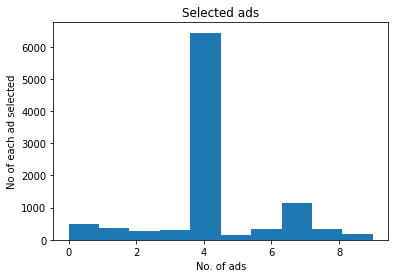

In [7]:
import matplotlib.pyplot as plt
plt.hist(ads_selected)
plt.title("Selected ads")
plt.xlabel("No. of ads")
plt.ylabel("No of each ad selected")
plt.show()